# PROJECT WORKED TOGETHER WITH STEPHANO MONTES AND HUZAIFA BIN-RAHMAN

# SETTING UP ENVIRONMENT 


We decided to take the random classifier approach to see if it would give us a better accuracy score

In [ ]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# LOAD DATA

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Get columns
train_target = train_data[["target","id"]]
train_data = train_data.drop(["target", "id"], axis=1)

class_names = {"Class_1": 1, "Class_2": 2, "Class_3": 3, "Class_4": 4, "Class_5": 5, "Class_6": 6, "Class_7": 7, "Class_8": 8, "Class_9": 9}
train_target_numeric = train_target["target"].apply(lambda x: class_names[x])

# CREATING THE RANDOM CLASSIFIER

In [ ]:
# EXTRACT VALUES
best_n_estimators = 250
best_n_features = 80

# Random forest classifier
clf = RandomForestClassifier(n_estimators=best_n_estimators, n_jobs=-1)


rfe = RFE(estimator=clf, n_features_to_select=best_n_features)

# FIT CLASSIFIER
fit = rfe.fit(train_data, train_target_numeric)

In [ ]:
# SAVE IDS
test_ids = test_data["id"]
test_ids = pd.DataFrame(test_ids, columns=["id"])

# take off id from test data
test_data = test_data.drop("id", axis=1)

In [ ]:
# Get probabilities
test_probabilities = fit.predict_proba(test_data)

Here we put the data frame in the columns

In [ ]:
test_probabilities_df = pd.DataFrame(test_probabilities, columns=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9"])

In [ ]:
test_probabilities_df.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.016,0.240,0.184,0.480,0.008,0.028,0.036,0.008,0.000
1,0.004,0.048,0.020,0.012,0.016,0.512,0.024,0.348,0.016
2,0.000,0.000,0.000,0.004,0.000,0.980,0.004,0.012,0.000
3,0.000,0.560,0.288,0.056,0.000,0.000,0.000,0.008,0.088
4,0.140,0.004,0.008,0.000,0.000,0.044,0.036,0.252,0.516


Here we created the final submission csv file

In [ ]:
# Combine probilities and ids
submission_df = pd.concat([test_ids, test_probabilities_df], axis=1)

# SAVE RESULTS
submission_df.to_csv("final_submission.csv", sep=",", index=None)

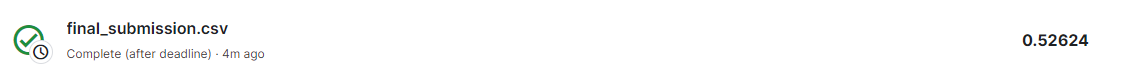